In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# All theory work is in notes

In [3]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [4]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


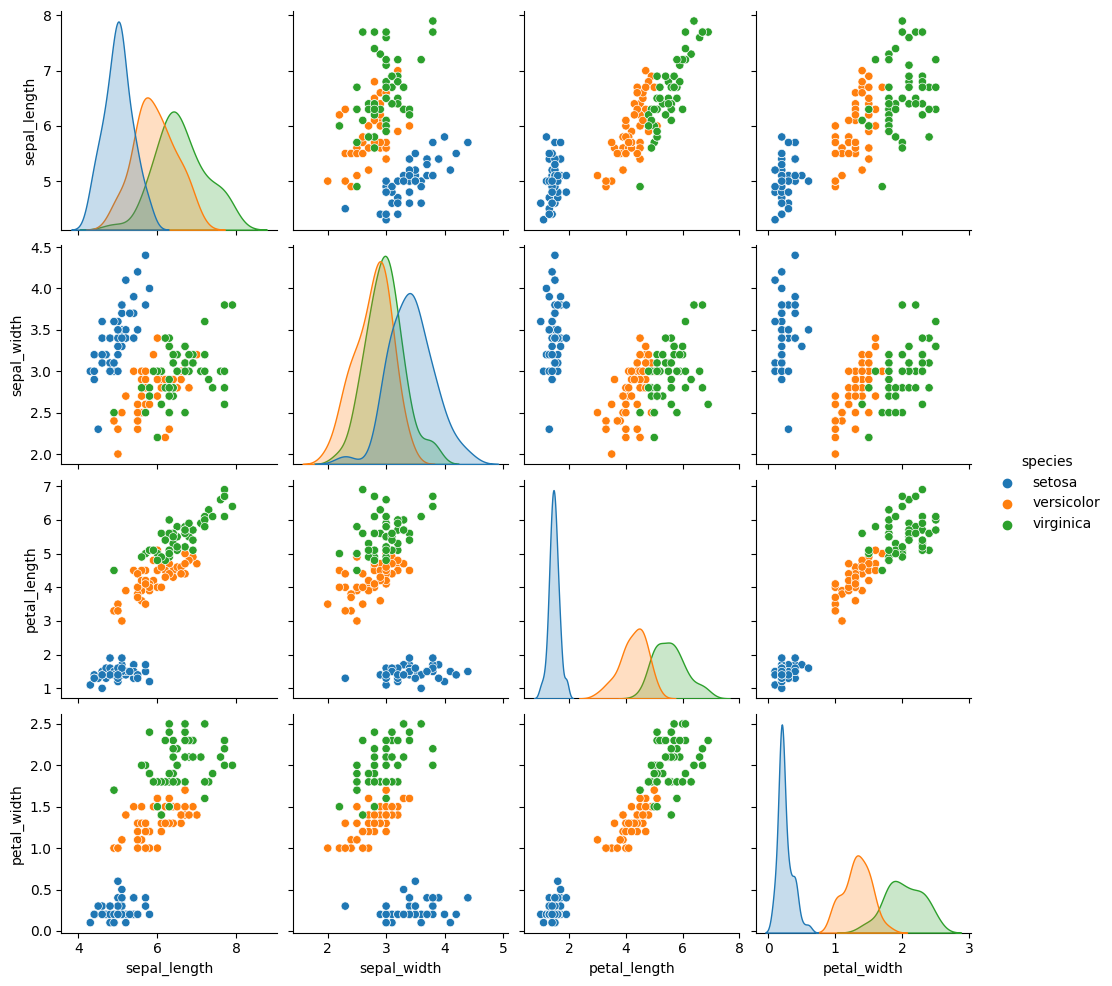

In [6]:
sns.pairplot(iris, hue = 'species')

In [7]:
from sklearn.preprocessing import OrdinalEncoder # use for converting categorical to numerical var in natural ordered

In [8]:
lr = OrdinalEncoder()
lr.fit(iris[['species']])
iris[['species']] = lr.transform(iris[['species']])

In [9]:
iris['species'].dtype

dtype('float64')

In [10]:
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 25, test_size = 0.2)

In [12]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 2) 
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [41, 37, 42]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.498\nsamples = 79\nvalue = [0, 37, 42]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.176\nsamples = 41\nvalue = [0, 37, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 38\nvalue = [0, 0, 38]')]

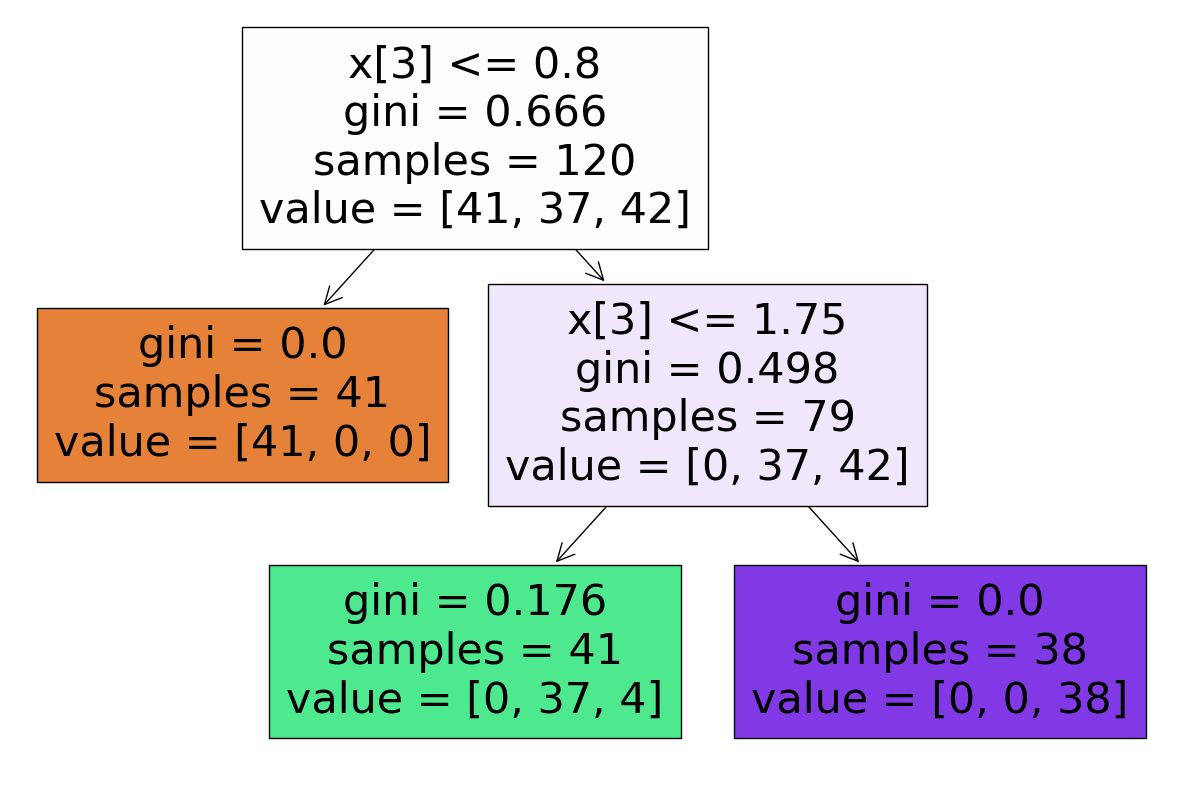

In [13]:
from sklearn import tree
plt.figure(figsize = (15,10))
tree.plot_tree(classifier, filled = True)

In [ ]:
# as above the leaf node has gini value of 0 that is why selecting max depth 2 is best option

In [14]:
from sklearn.metrics import classification_report 
y_pred = classifier.predict(X_test)

In [15]:
print(classification_report(y_pred, y_test)) # how well our model performed

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       0.92      0.92      0.92        13
         2.0       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

